<a href="https://colab.research.google.com/github/ysun155/Math-152/blob/main/exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration 2: The Random Walk
### By Group SDCN: Siqi Liu, Thomas Diem, Yijia Sun

#Distance of Two-Dimensional Random Walk
In this section, we talk about the expected distance of a N steps 2D random walk. Starting from the origin (0,0), we have two scenario: walking with four directions or walking with random directions. 

Scenario 1:
We have four directions: up, down, left, and right. Each direction has an equal chance to be chosen. If a direction is chosen, then we go in that direction by one step. 

Scenario 2:
We can go any directions we want. In other words, at every step of the walk, imagine there is a unit circle and you stand at the origin of the circle, you go one unit toward the circle. You may choose any direction for each step (of length 1).

For each scenario, we discuss the expected distance between origin and ending points.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from math import cos
from math import sin
from math import pi
from math import sqrt

Before we getting into the two-dimensional cases, we first discuss a simple one: one-dimensional random walk. Here, we only have two directions: left or right.\
We calculate the root mean sqaure of the distance of M numbers of random walk with N steps in one-dimension.

In [52]:
def distance(N):
  steps = np.random.choice([1,-1],N, p=[0.5,0.5]) #randomly get N numbers, either 1 (right) or -1 (left)
  sum = np.abs(np.sum(steps)) #take the abolute value of the sum
  return sum #return the distance

def average_distance(M,N):
  all_distance = np.zeros(M)
  for x in range(M):
    all_distance[x] = distance(N) #calculate the distance for M times
  RMS = np.sqrt(np.sum(all_distance ** 2) / M) #calculate the root mean square of distances from M samples
  return RMS

print(average_distance(100000,10000))
print(average_distance(100000,100))

99.97440772517734
10.003337443073686


The result is very obvious. After N steps, we can expect (on average) to be about $\sqrt{N}$ units away from the origin. After 10000 steps, the expected distance from origin is about 100; after 100 steps, the expected distance from origin is about 10.

Now, let's see if this works the same in two-dimensional. We first define two functions to help with later calculation.

In [ ]:
def RMS(all_distance):
  '''
  input value: array of distances
  calculate the root mean square of numbers
  '''
  RMS = np.sqrt(np.sum(all_distance ** 2) / len(all_distance))
  return RMS

In [ ]:
def average_distance(array):
  '''
  input value: arrary with two subarrays: first is x-coordinates, second is y-coordinates
  calculate the average distance from ending points to origin
  '''
  all_distance = np.zeros(len(array[0]))
  for i in range(len(array[0])):
    distance = np.sqrt(array[0][i] ** 2 + array[1][i] ** 2) #distance = sqrt(x^2+y^2)
    all_distance[i] = distance #return an array of distance
  return RMS(all_distance) #calculate the RMS of distances

###Scenario 1: Four Directions

In [ ]:
def Ending_randomwalk_four(M, N):
  '''
  M numbers of 2D random walk of N steps with four direction
  Return the coordinates of ending points
  '''
  xarray = []
  yarray = []
  for i in range(M):
    x, y = 0, 0 # Starting at (0, 0)
    for j in range(N):
      rand = np.random.choice([0,0.25,0.5,0.75]) # Randomly choose a direction (0=right, 0.25=up, 0.5=left, 0.75=down)
      x_movement = cos(2*pi*rand)
      y_movement = sin(2*pi*rand)
      x += x_movement
      y += y_movement
    xarray = np.append(xarray, x)
    yarray = np.append(yarray, y) 
  return (xarray,yarray)

In [ ]:
average_distance(Ending_randomwalk_four(100000,100)) #expected distance of 100000 random walks with 100 steps

9.98839126185994

In [ ]:
average_distance(Ending_randomwalk_four(1000,10000)) #expected distance of 1000 random walks with 10000 steps
#Since the function takes too much time, we only test for 1000 random walks

99.19147140757617

The RMS of 100000 random walks of 100 steps turn out to be around 10. The RMS of 1000 random walks of 10000 steps turn out to be around 100. So conclusion was found: the expected distances for N steps is roughly around $\sqrt{N}$.

###Scenario 2: Random Directions

In [ ]:
def Ending_randomwalk_any(M, N):
  '''
  M numbers of 2D random walk of N steps with random direction
  Return the coordinates of ending points
  '''
  xarray = []
  yarray = []
  for i in range(M):
    x, y = 0, 0 # Starting at (0, 0)
    for j in range(N):
      rand = np.random.random(1) # Choose a random number between 0 and 1
      x_movement = cos(2*pi*rand)
      y_movement = sin(2*pi*rand)
      x += x_movement
      y += y_movement
    xarray = np.append(xarray, x)
    yarray = np.append(yarray, y) 
  return (xarray,yarray)

In [ ]:
average_distance(Ending_randomwalk_any(100000,100)) #expected distance of 100000 random walks with 100 steps

9.989571446552757

In [ ]:
average_distance(Ending_randomwalk_any(1000,10000))#expected distance of 1000 random walks with 10000 steps
#Since the function takes too much time, we only test for 1000 random walks

100.95213876375976

Results are very similar to results for four directions. The RMS of 100000 random walks of 100 steps turn out to be around 10. The RMS of 1000 random walks of 10000 steps turn out to be around 100. So the expected distances for N steps is also roughly around $\sqrt{N}$ for random directions.

Therefore, we conclude from our observation that for two-dimensional random walk, the expected distance for N steps is always approximately around $\sqrt{N}$, regardless of the restriction to directions.

# Visualization of Two-Dimensional Random Walk with Matplot
In this section, by visualizing the endpoints of random walks with both four directions and random directions, we show the above conclusion that the expected distance for N steps is $\sqrt{N}$.

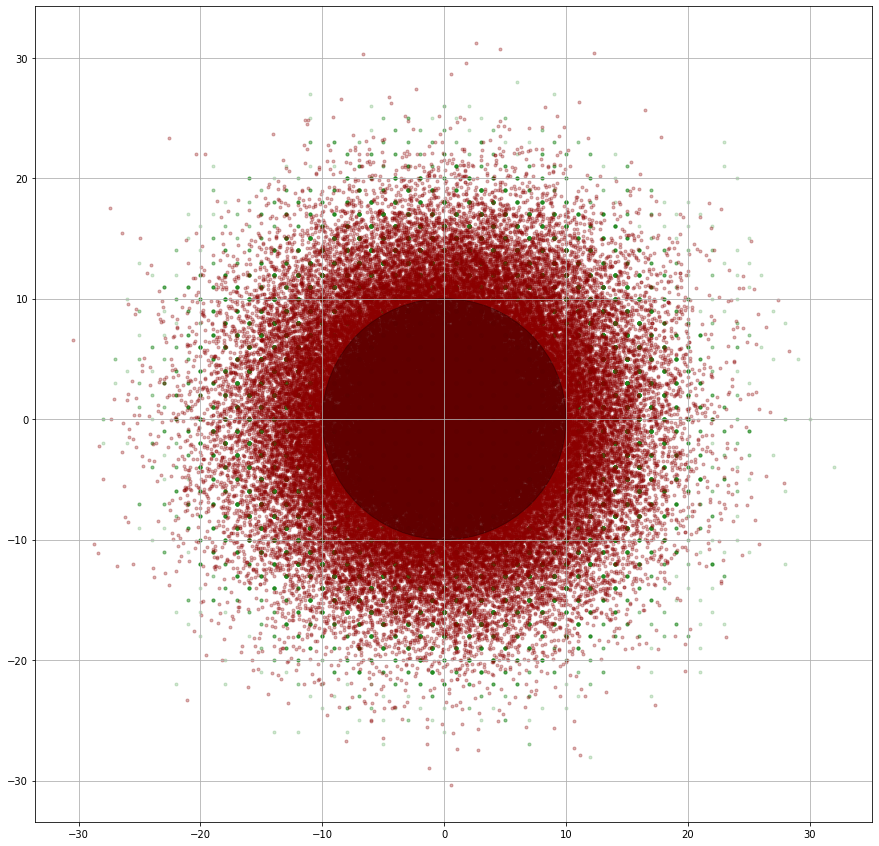

In [ ]:
any = Ending_randomwalk_any(100000, 100)
four = Ending_randomwalk_four(100000, 100)
plt.figure(figsize=(15,15))
plt.scatter(four[0], four[1], alpha = 0.2, marker='.', color='forestgreen')
plt.scatter(any[0], any[1], alpha = 0.3, marker='.', color='darkred')
c=plt.Circle((0,0),10, color='black', clip_on=False, alpha=0.3)
#add circle to plot
plt.gca().add_artist(c)
plt.grid()
plt.show()

By looking at this graph, we can see most of the endpoints are overlapping in the circle with 10 radius. Therefore, this visualization perfectly matches our conclusion on expected distance.

# Visualization of Two-Dimensional Random Walk with PIL

In this section, we will see 10,000 steps random walk in the 2D four directions case. There are nine people to do the walk. Let us see their walking path. Each color represents a person's random walk. 

In [ ]:
from PIL import Image, ImageColor

In [ ]:
def randomwalk_2D(N):
  '''
  Return two arrays and step numbers N.
  First array is the current location on the x-axis.
  Second array is the current location on the y-axis.
  Each step either goes up, down, left or right.
  Each direction will be randomly selected with the same probability.
  '''
  starting_x,  starting_y = 0, 0 # Starting at (0, 0)
  xarray = np.array([starting_x])
  yarray = np.array([starting_y])
  directions = np.array(['up','down','right','left']) # Random walk 2D has 4 directions 
  for i in range(N):
    step = np.random.choice(directions, p=[0.25,0.25,0.25,0.25]) # Choose a direction and each direction has the same probability to be chosen
    if step == 'up':
      xarray = np.append(xarray, xarray[i])
      yarray = np.append(yarray, yarray[i]+1) # Go up 1 point, (x_up, y_up) = (x, y+1)
    elif step == 'down':
      xarray = np.append(xarray, xarray[i])
      yarray = np.append(yarray, yarray[i]-1) # Go down 1 point, (x_down, y_down) = (x, y-1)
    elif step == 'right':
      xarray = np.append(xarray, xarray[i]+1)
      yarray = np.append(yarray, yarray[i]) # Go right 1 point, (x_right, y_right) = (x+1, y)
    else:
      xarray = np.append(xarray, xarray[i]-1)
      yarray = np.append(yarray, yarray[i]) # Go left 1 point, (x_left, y_left) = (x-1, y)
  
  ans = xarray, yarray, N
  return np.array(ans, dtype=object)

In [ ]:
walk1 = randomwalk_2D(10000)
walk2 = randomwalk_2D(10000)
walk3 = randomwalk_2D(10000)
walk4 = randomwalk_2D(10000)
walk5 = randomwalk_2D(10000)
walk6 = randomwalk_2D(10000)
walk7 = randomwalk_2D(10000)
walk8 = randomwalk_2D(10000)
walk9 = randomwalk_2D(10000)

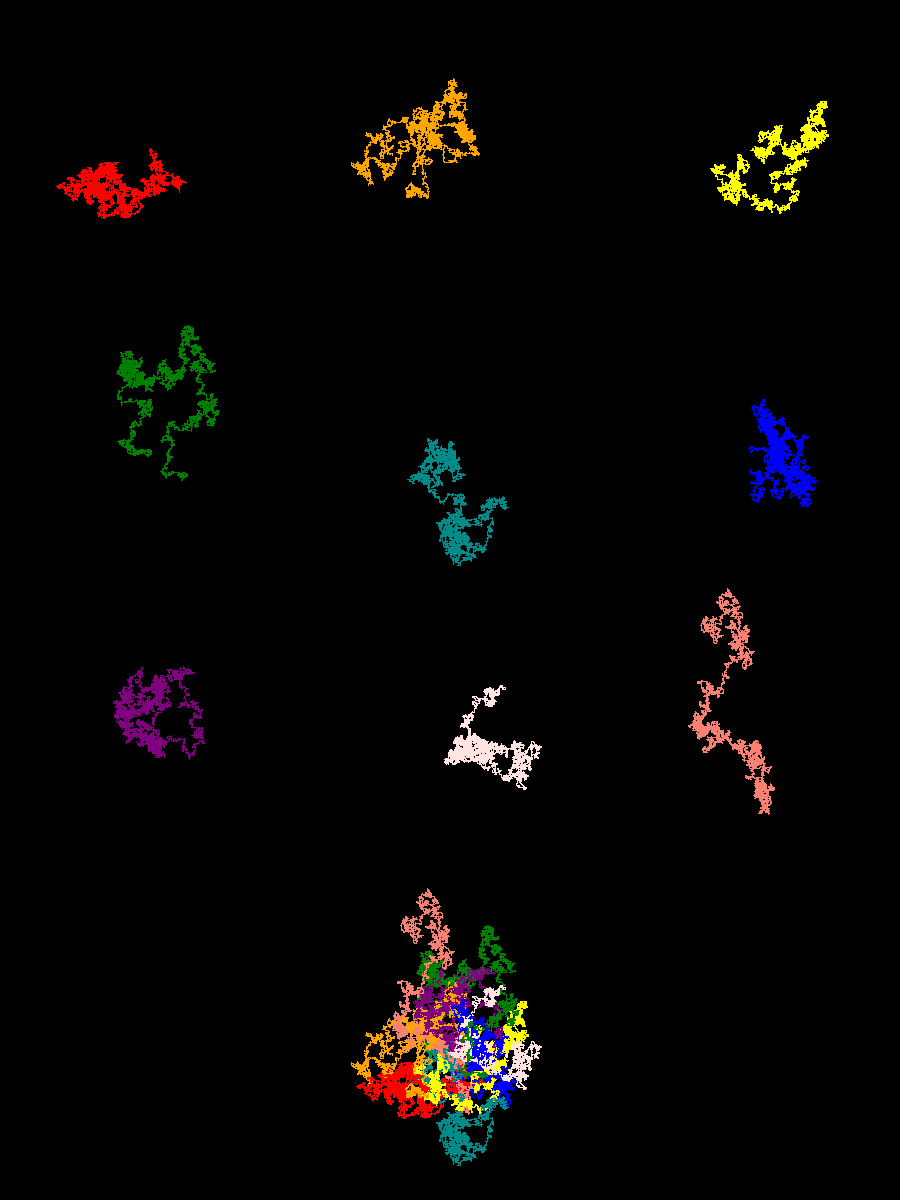

In [ ]:
array = np.zeros([1200,900,3], dtype=np.uint8)

for i in range(len(walk1[0])):

  array[150+walk1[0][i], 150+walk1[1][i]] = ImageColor.getrgb('red')
  array[150+walk2[0][i], 150*3+walk2[1][i]] = ImageColor.getrgb('orange')
  array[150+walk3[0][i], 150*5+walk3[1][i]] = ImageColor.getrgb('yellow')

  array[150*3+walk4[0][i], 150+walk4[1][i]] = ImageColor.getrgb('green')
  array[150*3+walk5[0][i], 150*3+walk5[1][i]] = ImageColor.getrgb('darkcyan')
  array[150*3+walk6[0][i], 150*5+walk6[1][i]] = ImageColor.getrgb('blue')
  
  array[150*5+walk7[0][i], 150+walk7[1][i]] = ImageColor.getrgb('purple')
  array[150*5+walk8[0][i], 150*3+walk8[1][i]] = ImageColor.getrgb('mistyrose')
  array[150*5+walk9[0][i], 150*5+walk9[1][i]] = ImageColor.getrgb('salmon')

for i in range(len(walk1[0])):

  array[900+150+walk1[0][i], 450+walk1[1][i]] = ImageColor.getrgb('red')
  array[900+150+walk2[0][i], 450+walk2[1][i]] = ImageColor.getrgb('orange')
  array[900+150+walk3[0][i], 450+walk3[1][i]] = ImageColor.getrgb('yellow')

  array[900+150+walk4[0][i], 450+walk4[1][i]] = ImageColor.getrgb('green')
  array[900+150+walk5[0][i], 450+walk5[1][i]] = ImageColor.getrgb('darkcyan')
  array[900+150+walk6[0][i], 450+walk6[1][i]] = ImageColor.getrgb('blue')
  
  array[900+150+walk7[0][i], 450+walk7[1][i]] = ImageColor.getrgb('purple')
  array[900+150+walk8[0][i], 450+walk8[1][i]] = ImageColor.getrgb('mistyrose')
  array[900+150+walk9[0][i], 450+walk9[1][i]] = ImageColor.getrgb('salmon')

img = Image.fromarray(array)
display(img)